# Análise de Dados

In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import re
import math
import scipy.stats as stats

In [7]:
pd.options.display.max_rows = 100

In [8]:
df = pd.read_csv('./dados.csv')

df['cor'] = df['cor'].str.replace(r'\d+', '')
df = df.drop(df[ df['cor'] == '' ].index)

# Para analise de dados, nao vou precisar das colunas href e info
df = df.drop(['href', 'info'], axis=1)

dfSemNaN = df.dropna()

dfComValores = df.drop(df[df['valor'] == 'A Combinar'].index)
dfComValores['valor'] = pd.to_numeric(dfComValores['valor'])

dfComValoresSemNaN = dfComValores.dropna()

df

,modelo,marca,valor,km,transmissao,combustivel,cor,ano,novidade,vendedor
0,CELTA,CHEVROLET,34500.0,NaN,manual,flex,Marrom,2014,True,JLA Corretora
1,COMPASS,JEEP,A Combinar,22523.0,automatico,diesel,branco,2021,False,Scuderia Veículos e Pick-ups
2,NEW,FORD,42000.0,NaN,automatico,flex,Branco,2014,True,JLA Corretora
3,ECOSPORT,FORD,52000.0,NaN,manual,flex,Preto,2014,True,JLA Corretora
4,SPORTAGE,KIA,83000.0,NaN,automatico,flex,Branco,2015,True,JLA Corretora
...,...,...,...,...,...,...,...,...,...,...
3090,LOGAN,RENAULT,41490.0,NaN,manual,flex,Branco,2017,False,MOVIDA SEMINOVOS RECIFE (Caxangá)
3091,PRISMA,CHEVROLET,41990.0,NaN,manual,flex,Branco,2018,False,MOVIDA SEMINOVOS RECIFE (Caxangá)
3092,GOL,VOLKSWAGEN,38990.0,NaN,manual,flex,Prata,2018,False,MOVIDA SEMINOVOS RECIFE (Caxangá)
3093,PAJERO,MITSUBISHI,49990.0,NaN,automatico,flex,Prata,2013,False,Indique Auto


## Algumas funções

In [9]:
def mediaPorNome(df, colNome, nome, colMedia):
    df_filtrado = df[df[colNome] == nome]

    return pd.to_numeric(df_filtrado[colMedia], errors='coerce').mean()

In [10]:
mediaPorNome(df, 'transmissao', 'manual', 'valor')

105954.86018641811

In [11]:
coluna = pd.to_numeric(df['km'].dropna())

coluna = coluna.to_frame()

In [12]:
def freqTableNum(df, column, inteiro = False):

    try:
        coluna = pd.to_numeric(df[column].dropna())
    except:
        raise "NAO EH POSSIVEL TRANSFORMAR PARA NUMERICO"  
    
    k = math.ceil(math.sqrt(len(coluna)))
    limInf = coluna.min()
    limSup = coluna.max()

    amp = (limSup - limInf) / k
    if inteiro: amp = math.ceil(amp)
    # [li     ; Ls)
    # fechado ; aberto

    bins = []
    soma = limInf
    while soma < limSup:
        bins.append(round(soma, 3))
        soma += amp

    labels = []
    for i in range(0, len(bins)-1):
        labels.append(str(bins[i]) + ' - ' + str(bins[i+1]))

    # encaixando classes
    dframe = coluna.to_frame()
    dframe['classes'] = pd.cut(dframe[column], bins, labels=labels)
    
    # ajustando frequencia
    dframe = pd.crosstab(index=dframe['classes'], columns='frequencia')

    dframe['Freq. acumulada'] = dframe['frequencia'].cumsum()

    quant_total = dframe['frequencia'].sum()
    
    dframe['frequencia %'] = np.round(dframe['frequencia']*100 / quant_total, 2)
    dframe['Freq%. acumulada'] = dframe['frequencia %'].cumsum()

    return dframe

### Frequência nas colunas numéricas:

In [13]:
freqTableNum(dfComValores, 'valor')

col_0,frequencia,Freq. acumulada,frequencia %,Freq%. acumulada
classes,,,,
201.0 - 348022.696,2012,2012,99.21,99.21
348022.696 - 695844.391,7,2019,0.35,99.56
1391487.783 - 1739309.478,1,2020,0.05,99.61
2782774.565 - 3130596.261,1,2021,0.05,99.66
4521883.043 - 4869704.739,1,2022,0.05,99.71
5565348.13 - 5913169.826,1,2023,0.05,99.76
6260991.522 - 6608813.217,1,2024,0.05,99.81
6608813.217 - 6956634.913,1,2025,0.05,99.86
6956634.913 - 7304456.609,1,2026,0.05,99.91


In [14]:
freqTableNum(dfSemNaN, 'km')

col_0,frequencia,Freq. acumulada,frequencia %,Freq%. acumulada
classes,,,,
1.0 - 4475000.975,1510,1510,98.95,98.95
8950000.95 - 13425000.925,1,1511,0.07,99.02
22375000.875 - 26850000.85,1,1512,0.07,99.09
49225000.725 - 53700000.7,1,1513,0.07,99.16
62650000.65 - 67125000.625,1,1514,0.07,99.23
71600000.6 - 76075000.575,1,1515,0.07,99.30
76075000.575 - 80550000.55,3,1518,0.20,99.50
85025000.525 - 89500000.5,3,1521,0.20,99.70
98450000.45 - 102925000.425,1,1522,0.07,99.77


In [15]:
freqTableNum(dfComValores, 'ano', True)

col_0,frequencia,Freq. acumulada,frequencia %,Freq%. acumulada
classes,,,,
1981 - 1982,1,1,0.05,0.05
1983 - 1984,1,2,0.05,0.10
1987 - 1988,1,3,0.05,0.15
1988 - 1989,2,5,0.10,0.25
1989 - 1990,1,6,0.05,0.30
1990 - 1991,1,7,0.05,0.35
1992 - 1993,1,8,0.05,0.40
1994 - 1995,2,10,0.10,0.50
1995 - 1996,2,12,0.10,0.60


Como podemos ver, as tabelas de frequencia para 

    valor e km

denunciam a presença de outliers

In [16]:
def freqTable(df, column):
    coluna = df[column]

    frequencia = coluna.value_counts().reset_index()
    frequencia.columns = [column, 'frequencia']

    quant_total = frequencia['frequencia'].sum()

    frequencia['frequencia %'] = round(frequencia['frequencia']*100 / quant_total, 2)

    return frequencia

# Tabela de Frequência por marca

In [17]:
frequencia = freqTable(df, 'marca')

# plot da tabela de frequencias
frequencia

,marca,frequencia,frequencia %
0,VOLKSWAGEN,469,15.15
1,CHEVROLET,432,13.96
2,FORD,323,10.44
3,FIAT,305,9.85
4,HYUNDAI,268,8.66
5,RENAULT,230,7.43
6,TOYOTA,214,6.91
7,JEEP,190,6.14
8,NISSAN,157,5.07
9,HONDA,135,4.36


## Grafico de barras de marca e frequências

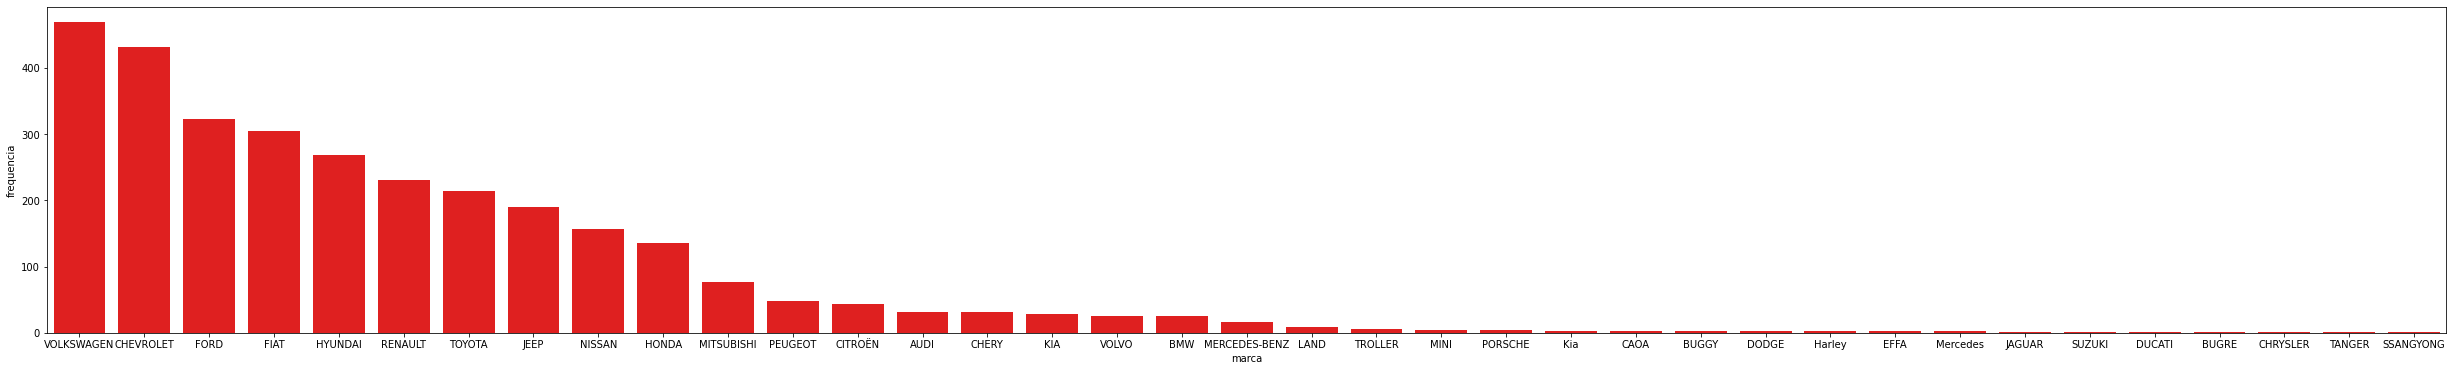

In [18]:
plt.figure(figsize=(43, 6))

sns.barplot(data=frequencia, x='marca', y='frequencia', color='red')
plt.show()

## Histograma de preço e frequências

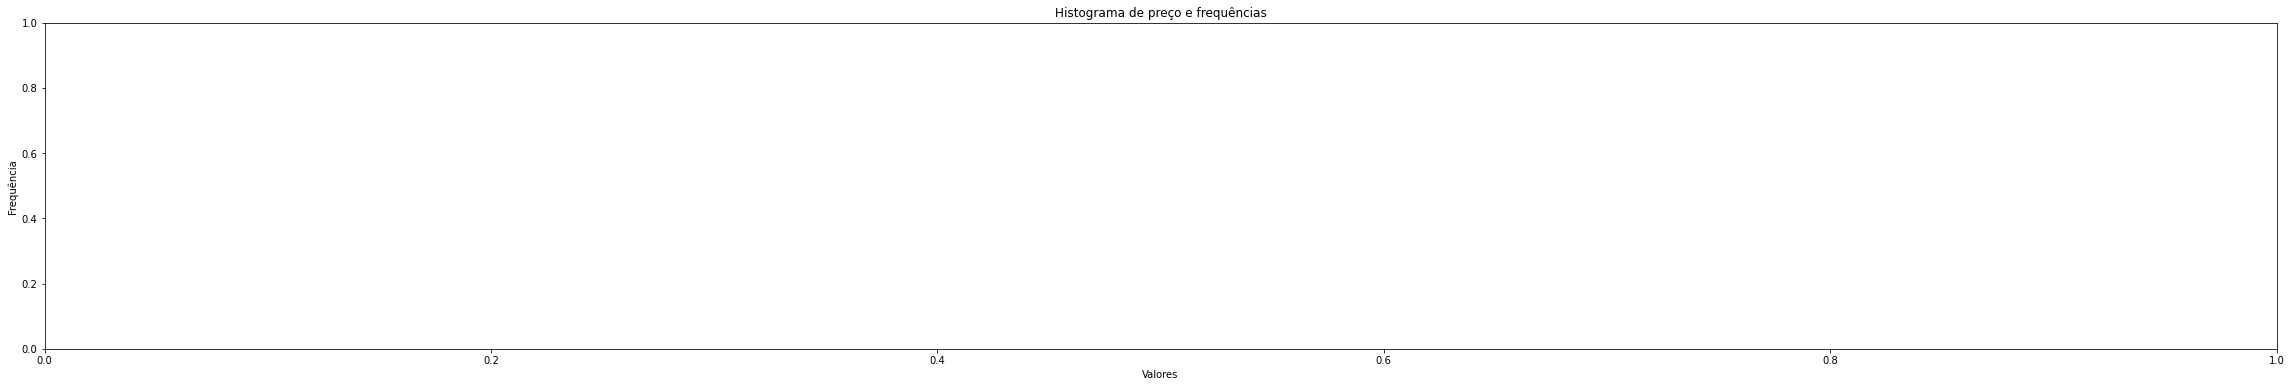

In [19]:

plt.figure(figsize=(40, 6))

df2 = df[ df['valor'] != 'A Combinar' ]

lista = pd.to_numeric(df2['valor'], errors='coerce').T.to_numpy().tolist()

# limites de +/- o desvio padrão em relação à média
media = np.mean(lista)
desvio_padrao = np.std(lista)
limite_inferior = media - desvio_padrao
limite_superior = media + desvio_padrao
dados_filtrados = [x for x in lista if limite_inferior <= x <= limite_superior]

# retirando alguns valores absurdos
# sns.histplot(data=dados_filtrados)

plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma de preço e frequências')

plt.show()

## BoxPlot

Observar distribuição de preços com boxplot

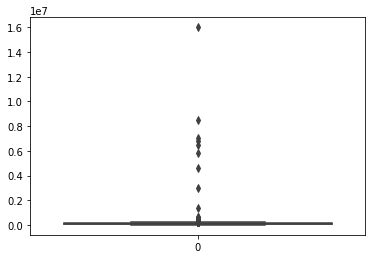

In [20]:
precos = pd.to_numeric(dfComValores['valor'], errors='coerce')

sns.boxplot(data=precos.values)

plt.show()

Alguns outliers observados...

Retirando alguns outiliers do BoxPlot:

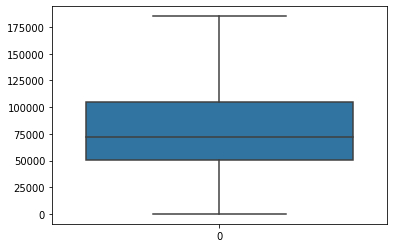

In [21]:
limite = precos.quantile(0.75) * 1.5
precos = precos[precos < limite]

sns.boxplot(data=precos.values)

plt.show()

In [22]:
indices = precos.index

dfSemOutlier = dfComValores.loc[indices]
dfSemOutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 0 to 3094
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelo       1821 non-null   object 
 1   marca        1821 non-null   object 
 2   valor        1821 non-null   float64
 3   km           1421 non-null   float64
 4   transmissao  1526 non-null   object 
 5   combustivel  1814 non-null   object 
 6   cor          1821 non-null   object 
 7   ano          1821 non-null   int64  
 8   novidade     1821 non-null   bool   
 9   vendedor     1821 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 144.0+ KB


Separação de preços em 3 classes:

BARATO, MEDIO, CARO

In [23]:
def categorizar_por_percent(data, primeiro_percentil, segundo_percentil):
    if data > primeiro_percentil:
        return "CARO"
    elif data <= primeiro_percentil and data > segundo_percentil:
        return "MEDIO"
    else:
        return "BARATO"

Aplicando categorização:

In [24]:
dfCategorizada = df.copy()

dfCategorizada['valor'] = pd.to_numeric(dfComValores['valor']).apply( categorizar_por_percent, primeiro_percentil=pd.to_numeric(dfComValores['valor']).quantile(0.75), segundo_percentil=pd.to_numeric(dfComValores['valor']).quantile(0.25)  )

# Mostrando quantidade de valores para cada categoria
print(dfCategorizada['valor'].value_counts()) 

dfCategorizada

valor
MEDIO     1014
BARATO     508
CARO       507
Name: count, dtype: int64


,modelo,marca,valor,km,transmissao,combustivel,cor,ano,novidade,vendedor
0,CELTA,CHEVROLET,BARATO,NaN,manual,flex,Marrom,2014,True,JLA Corretora
1,COMPASS,JEEP,NaN,22523.0,automatico,diesel,branco,2021,False,Scuderia Veículos e Pick-ups
2,NEW,FORD,BARATO,NaN,automatico,flex,Branco,2014,True,JLA Corretora
3,ECOSPORT,FORD,BARATO,NaN,manual,flex,Preto,2014,True,JLA Corretora
4,SPORTAGE,KIA,MEDIO,NaN,automatico,flex,Branco,2015,True,JLA Corretora
...,...,...,...,...,...,...,...,...,...,...
3090,LOGAN,RENAULT,BARATO,NaN,manual,flex,Branco,2017,False,MOVIDA SEMINOVOS RECIFE (Caxangá)
3091,PRISMA,CHEVROLET,BARATO,NaN,manual,flex,Branco,2018,False,MOVIDA SEMINOVOS RECIFE (Caxangá)
3092,GOL,VOLKSWAGEN,BARATO,NaN,manual,flex,Prata,2018,False,MOVIDA SEMINOVOS RECIFE (Caxangá)
3093,PAJERO,MITSUBISHI,BARATO,NaN,automatico,flex,Prata,2013,False,Indique Auto


### Análise de cada coluna do dataframe:

In [25]:
colsNum = ['km', 'ano']
colsStr = ['modelo', 'marca', 'valor', 'transmissao', 'combustivel', 'cor', 'vendedor']
colsBool =['novidade']

# checando presença de valor dominante
for col in colsNum:
    print(col, ': [qtd max de vezes que um numero aparece: ', dfCategorizada[col].value_counts().max(), ' | qtd total: ', dfCategorizada[col].value_counts().sum(), ']', sep='')


km: [qtd max de vezes que um numero aparece: 38 | qtd total: 1950]
ano: [qtd max de vezes que um numero aparece: 447 | qtd total: 3095]


É possível observar que nas duas colunas numéricas do dataframe categorizado não há a presença de um valor dominante.

Observar agora distribuições dos valores numéricos:

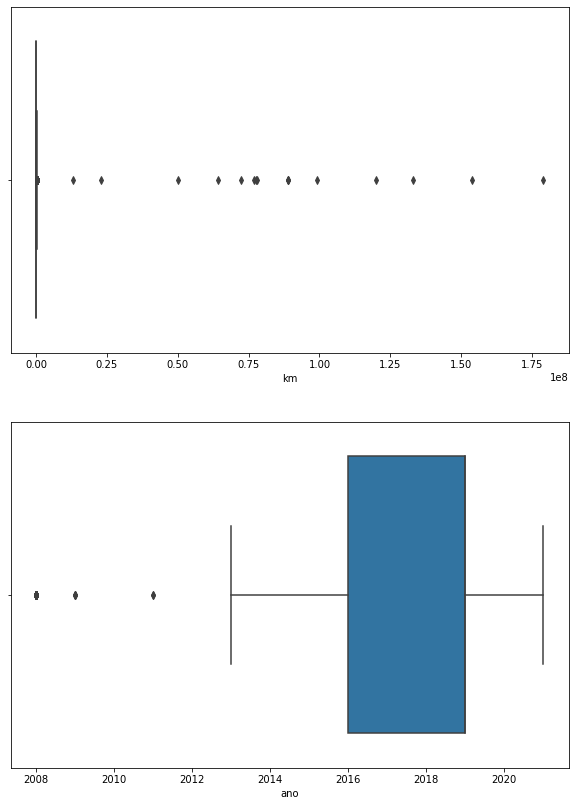

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10, 14))

# plot kmtragem
# sns.kdeplot(data=dfCategorizada.dropna()['km'].astype('int'), x=dfCategorizada['km'], ax=ax[0][0])
sns.boxplot(data=dfCategorizada.dropna()['km'].astype('int'), x=dfCategorizada['km'], ax=ax[0])

# plot ano
# sns.kdeplot(data=dfCategorizada['ano'], x=dfCategorizada['ano'], ax=ax[1][0])
sns.boxplot(data=dfCategorizada['ano'], x=dfCategorizada['ano'], ax=ax[1])

plt.show()

In [36]:
# Função que retorna filtro retirando outliers de uma coluna do dataframe

def filtroSemOutlier(df, col):

    df[col] = pd.to_numeric(df[col])
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    distInterQ = q3 - q1

    limInf = q1 - (1.5 * distInterQ)
    limSup = q3 + (1.5 * distInterQ)

    return (df[col] > limInf) & (df[col] < limSup)

In [37]:
# Com outliers

dfCategorizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelo       3095 non-null   object 
 1   marca        3095 non-null   object 
 2   valor        2029 non-null   object 
 3   km           1950 non-null   float64
 4   transmissao  2603 non-null   object 
 5   combustivel  3083 non-null   object 
 6   cor          3095 non-null   object 
 7   ano          3095 non-null   int64  
 8   novidade     3095 non-null   bool   
 9   vendedor     3095 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 220.8+ KB


In [38]:
# Sem outliers

dfSemOutlierCategorizado = dfCategorizada.copy()

dfSemOutlierCategorizado = dfSemOutlierCategorizado[filtroSemOutlier(dfSemOutlierCategorizado, 'km')]
dfSemOutlierCategorizado = dfSemOutlierCategorizado[filtroSemOutlier(dfSemOutlierCategorizado, 'ano')]

dfSemOutlierCategorizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831 entries, 1 to 3054
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelo       1831 non-null   object 
 1   marca        1831 non-null   object 
 2   valor        1513 non-null   object 
 3   km           1831 non-null   float64
 4   transmissao  1428 non-null   object 
 5   combustivel  1827 non-null   object 
 6   cor          1831 non-null   object 
 7   ano          1831 non-null   int64  
 8   novidade     1831 non-null   bool   
 9   vendedor     1831 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 144.8+ KB


Repetindo plots com outliers retirados:

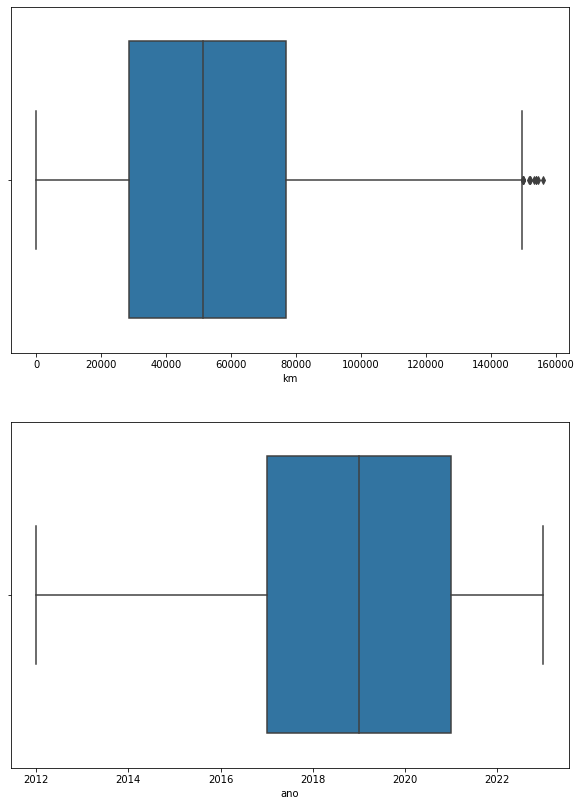

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(10, 14))

# plot kmtragem
# sns.kdeplot(data=dfSemOutlierCategorizado.dropna()['km'].astype('int'), x=dfSemOutlierCategorizado['km'], ax=ax[0][0])
sns.boxplot(data=dfSemOutlierCategorizado.dropna()['km'].astype('int'), x=dfSemOutlierCategorizado['km'], ax=ax[0])

# plot ano
# sns.kdeplot(data=dfSemOutlierCategorizado['ano'], x=dfSemOutlierCategorizado['ano'], ax=ax[1][0])
sns.boxplot(data=dfSemOutlierCategorizado['ano'], x=dfSemOutlierCategorizado['ano'], ax=ax[1])

plt.show()

Melhor visualização de dados após o filtro.

Vejamos agora como ficam as tabelas de frequencia:

In [42]:
freqTableNum(dfSemOutlierCategorizado, 'km')

col_0,frequencia,Freq. acumulada,frequencia %,Freq%. acumulada
classes,,,,
1.0 - 3633.721,79,79,4.33,4.33
3633.721 - 7266.442,24,103,1.32,5.65
7266.442 - 10899.163,44,147,2.41,8.06
10899.163 - 14531.884,77,224,4.22,12.28
14531.884 - 18164.605,69,293,3.78,16.06
18164.605 - 21797.326,42,335,2.30,18.36
21797.326 - 25430.047,70,405,3.84,22.20
25430.047 - 29062.767,60,465,3.29,25.49
29062.767 - 32695.488,57,522,3.13,28.62


In [43]:
freqTableNum(dfSemOutlierCategorizado, 'ano', True)

col_0,frequencia,Freq. acumulada,frequencia %,Freq%. acumulada
classes,,,,
2012 - 2013,54,54,3.10,3.10
2013 - 2014,79,133,4.53,7.63
2014 - 2015,91,224,5.22,12.85
2015 - 2016,92,316,5.28,18.13
2016 - 2017,133,449,7.63,25.76
2017 - 2018,198,647,11.35,37.11
2018 - 2019,289,936,16.57,53.68
2019 - 2020,326,1262,18.69,72.37
2020 - 2021,252,1514,14.45,86.82


### Visualização de colunas não numéricas

In [44]:
colsStr.append(colsBool[0])

colsStr

['modelo',
 'marca',
 'valor',
 'transmissao',
 'combustivel',
 'cor',
 'vendedor',
 'novidade']

['modelo', 'marca', 'valor', 'transmissao', 'combustivel', 'cor', 'vendedor', 'novidade']


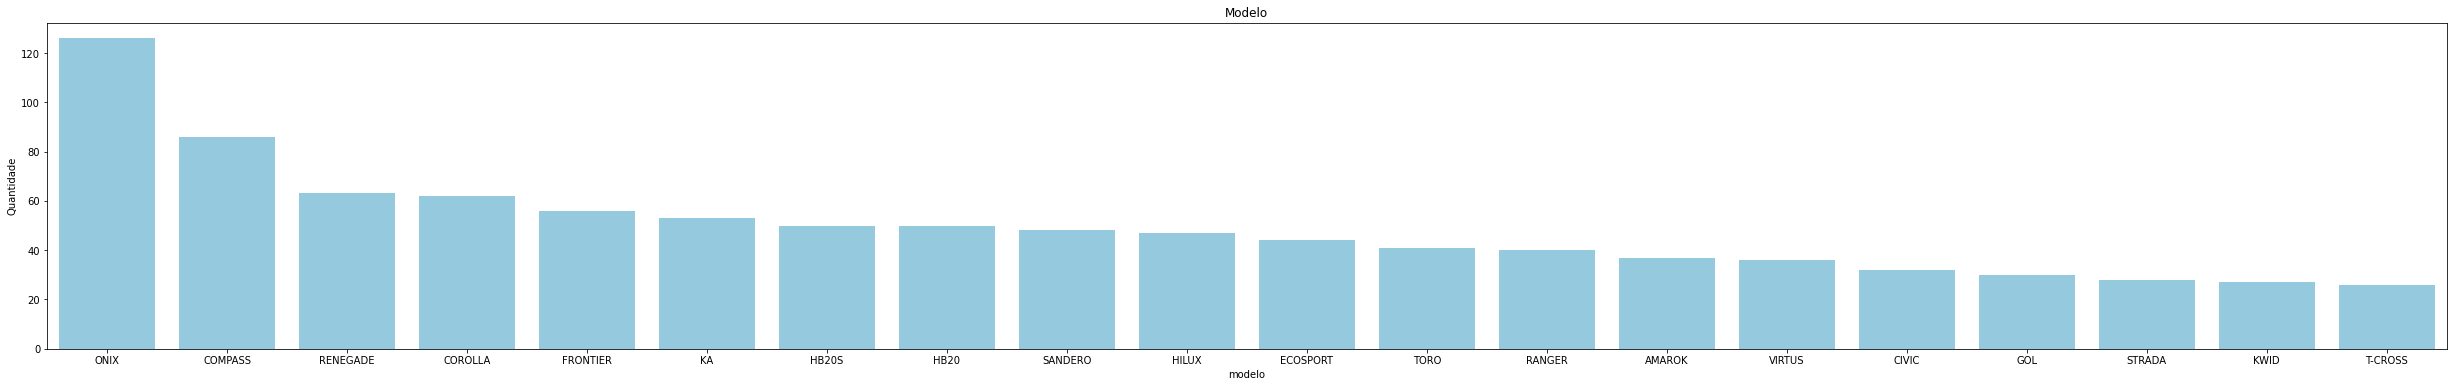

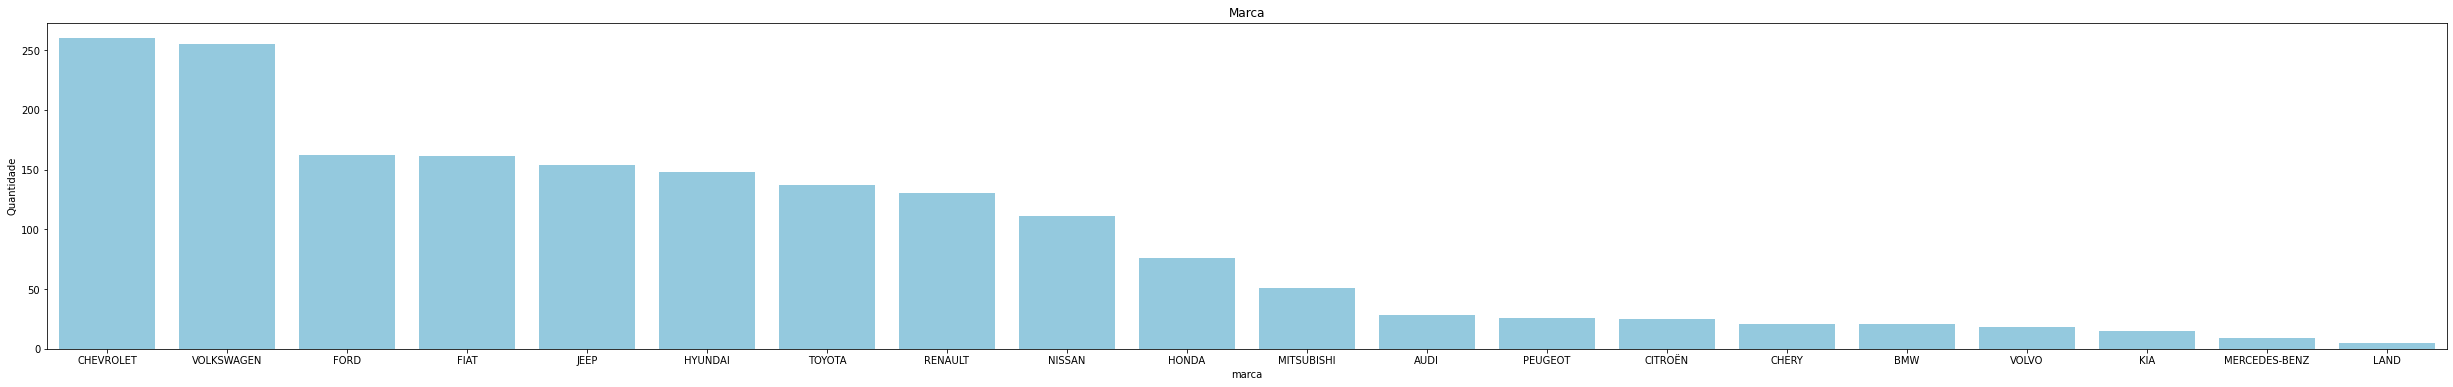

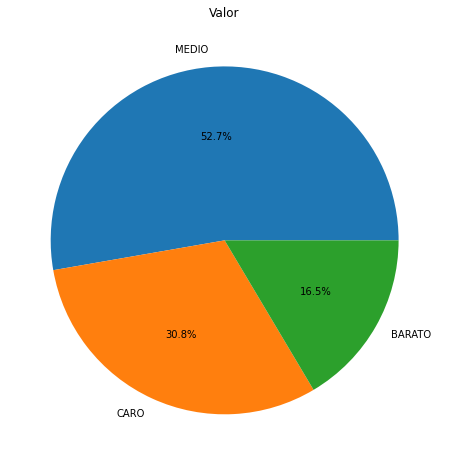

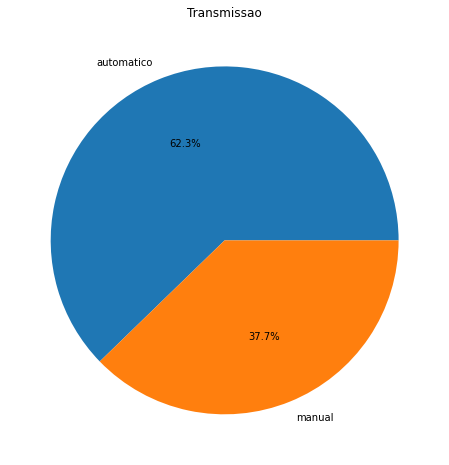

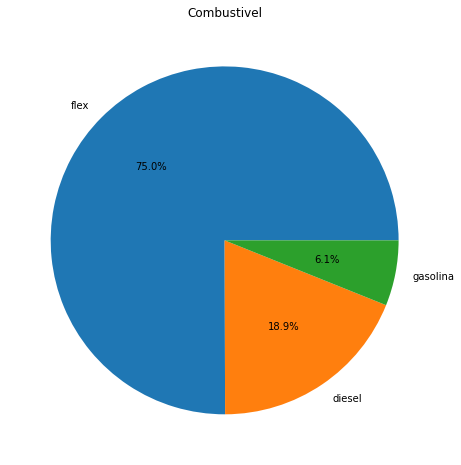

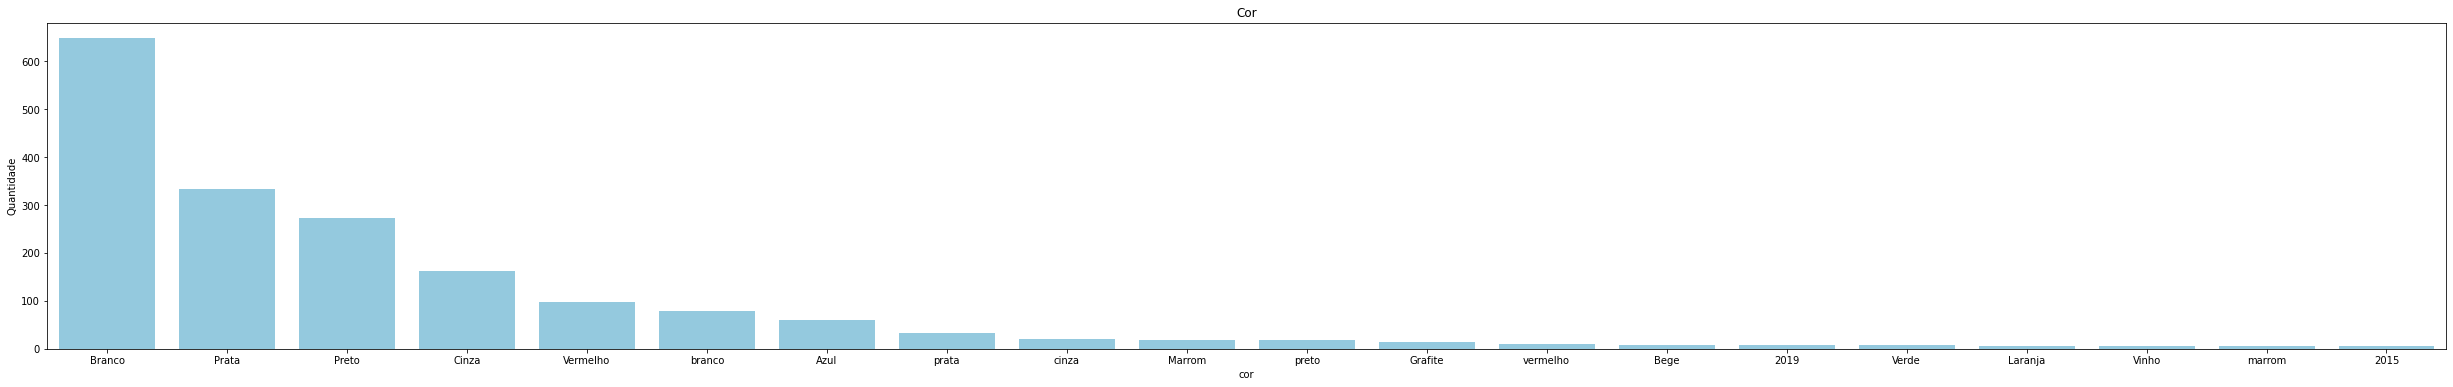

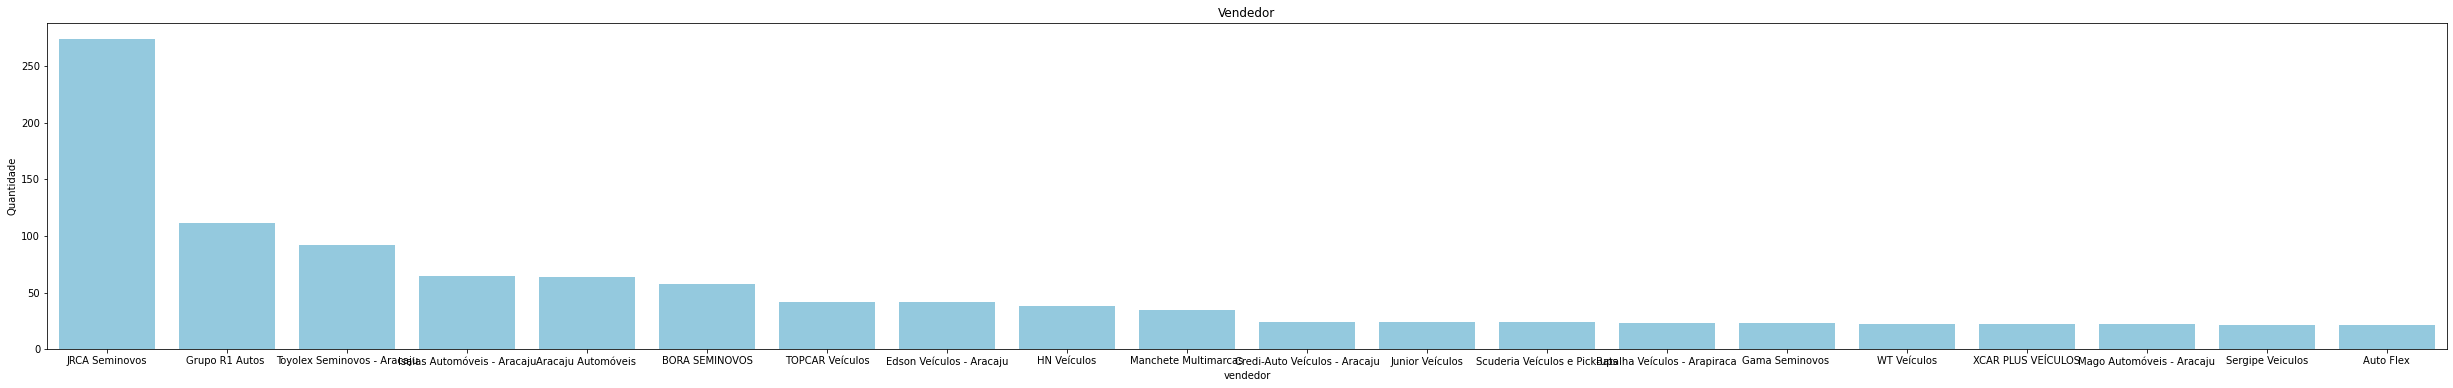

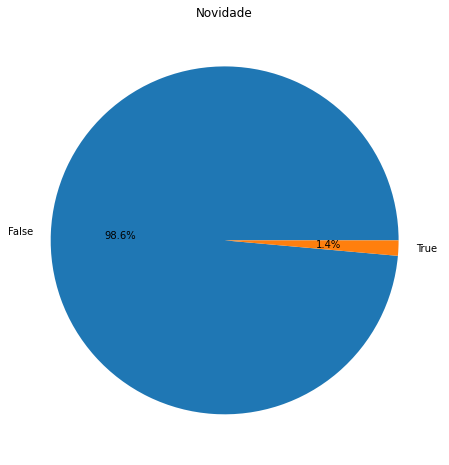

In [45]:
print(colsStr)

for col in colsStr:

    values = dfSemOutlierCategorizado[col].value_counts()

    if (len(values) < 5):

        plt.figure(figsize=(8, 8), facecolor='white')
        values.plot(kind='pie', autopct='%1.1f%%')
        plt.title(col.capitalize())
        plt.ylabel('')

    else:

        if (len(values) > 20):
            values = values[:20] # valores mais significativos

        values = values.reset_index()
        values.columns = [col, 'qtd']
        
        plt.figure(figsize=(43, 6))
        plt.title(col.capitalize())
        sns.barplot(data=values, x=col, y='qtd', color='skyblue')
        plt.ylabel('Quantidade')

    plt.show()

Retirando a coluna

        novidade

pois apresenta valor dominante

In [46]:
dfSemOutlierCategorizado = dfSemOutlierCategorizado.drop(['novidade'], axis=1)
dfSemOutlierCategorizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831 entries, 1 to 3054
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelo       1831 non-null   object 
 1   marca        1831 non-null   object 
 2   valor        1513 non-null   object 
 3   km           1831 non-null   float64
 4   transmissao  1428 non-null   object 
 5   combustivel  1827 non-null   object 
 6   cor          1831 non-null   object 
 7   ano          1831 non-null   int64  
 8   vendedor     1831 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 207.6+ KB


In [47]:
dfSemOutlierCategorizado

,modelo,marca,valor,km,transmissao,combustivel,cor,ano,vendedor
1,COMPASS,JEEP,NaN,22523.0,automatico,diesel,branco,2021,Scuderia Veículos e Pick-ups
7,CRUZE,CHEVROLET,CARO,26578.0,automatico,flex,Prata,2022,Autoforte Veículos Ltda
8,CHERY,CAOA,CARO,30474.0,automatico,gasolina,Preto,2022,Autoforte Veículos Ltda
9,HILUX,TOYOTA,CARO,65105.0,automatico,diesel,Prata,2017,Toyolex Seminovos - Aracaju
10,YARIS,TOYOTA,MEDIO,28079.0,NaN,flex,Azul,2022,Toyolex Seminovos - Aracaju
...,...,...,...,...,...,...,...,...,...
3048,PICANTO,KIA,BARATO,62000.0,automatico,flex,2012,2012,Indique Auto
3049,HB20,HYUNDAI,BARATO,15000.0,manual,flex,Prata,2016,Indique Auto
3051,MARCH,NISSAN,BARATO,30000.0,manual,flex,2016,2016,Indique Auto
3053,318i,BMW,MEDIO,67000.0,automatico,gasolina,Preto,2012,Indique Auto


#### Fazendo o df sem outlier e sem categoria
para as próximas etapas...

In [48]:
dfSemOutlier = dfComValores.copy()

dfSemOutlier = dfSemOutlier[filtroSemOutlier(dfSemOutlier, 'valor')]
dfSemOutlier = dfSemOutlier[filtroSemOutlier(dfSemOutlier, 'km')]
dfSemOutlier = dfSemOutlier[filtroSemOutlier(dfSemOutlier, 'ano')]

dfSemOutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414 entries, 7 to 3054
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   modelo       1414 non-null   object 
 1   marca        1414 non-null   object 
 2   valor        1414 non-null   float64
 3   km           1414 non-null   float64
 4   transmissao  1116 non-null   object 
 5   combustivel  1411 non-null   object 
 6   cor          1414 non-null   object 
 7   ano          1414 non-null   int64  
 8   novidade     1414 non-null   bool   
 9   vendedor     1414 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 111.8+ KB


In [49]:
dfSemOutlier.to_csv('dados_sem_outlier.csv', index=False)

## Correlações:

### Checando se os valores numéricos possuem correlação

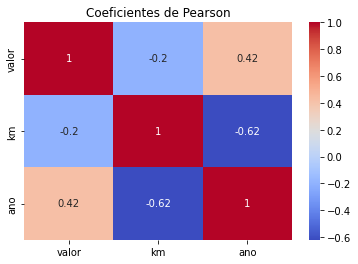

In [50]:
# Calcular as correlações entre as colunas
correlations = dfSemOutlier[['valor', 'km', 'ano']].corr()

# Plotar um mapa de calor das correlações
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Coeficientes de Pearson')
plt.show()

a coluna

    valor 

possui uma tendencia a ser correlacionada com 

    ano

porém o contrário com 

    km 


## QQ Plot

In [51]:
def makeQQPlotNorm(df, col):

    dados = sorted(df[col])

    distribuicao = stats.norm 

    quantis = distribuicao.ppf( [ (i-0.5)/len(dados) for i in range(1, len(dados)+1)] )
    print(quantis, len(quantis))

    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=quantis, y=dados, marker='o')

    # Ajustes de layout
    plt.title("Q-Q plot da coluna: " + col)
    plt.xlabel("Quantis normais")
    plt.ylabel("Quantis dos dados")

    # Exibição do Q-Q plot
    plt.show()


[-3.38676725 -3.07265436 -2.91683146 ...  2.91683146  3.07265436
  3.38676725] 1414


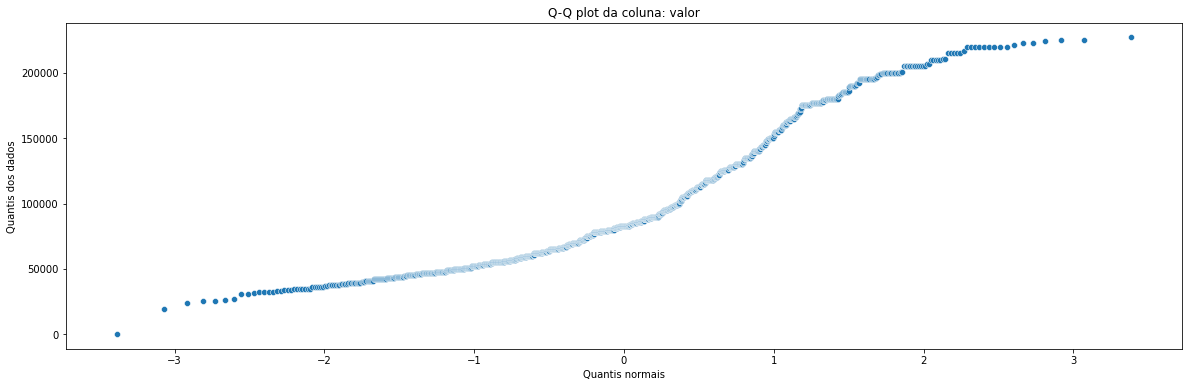

[-3.38676725 -3.07265436 -2.91683146 ...  2.91683146  3.07265436
  3.38676725] 1414


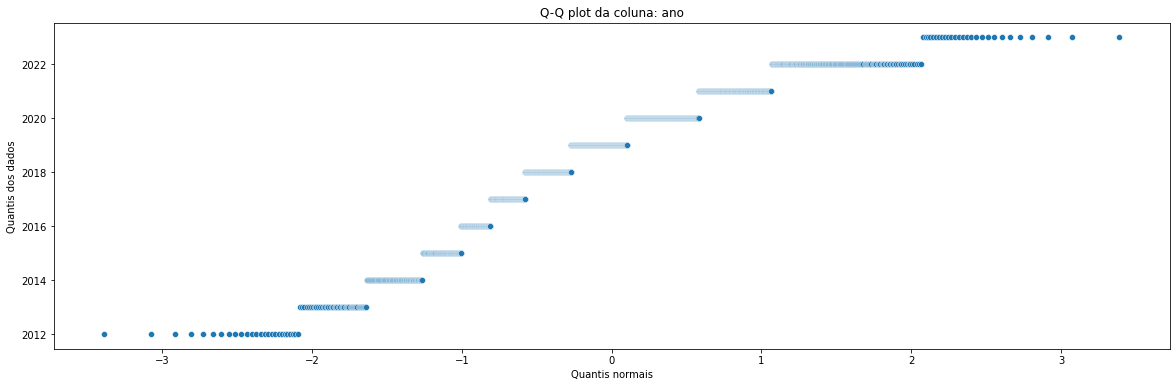

[-3.32077894 -3.00076782 -2.84163174 ...  2.84163174  3.00076782
  3.32077894] 1114


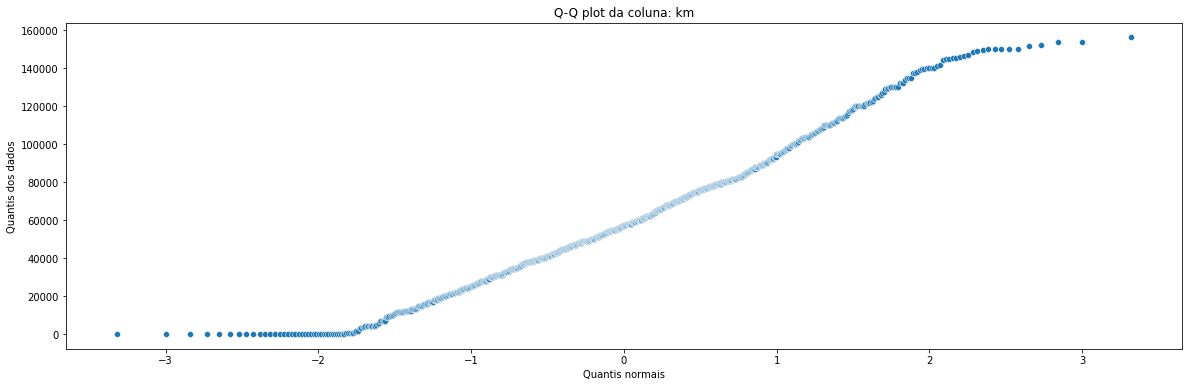

In [52]:
for nome in ['valor', 'ano']:
    makeQQPlotNorm(dfSemOutlier, nome)

makeQQPlotNorm(dfSemOutlier.dropna(), 'km')

## Testes de Normalidade

Teste Kolmogorov-Smirnov

In [53]:
def testNormalidade(list):

    standard = stats.zscore(list.values).flatten()
    d, p = stats.kstest(standard, 'norm', alternative='greater')

    return d < p

In [54]:
for nome in ['valor', 'km', 'ano']:
    if testNormalidade(dfSemOutlier[nome]):
        print(nome, "passou no teste!")
    else:
        print(nome, "não passou no teste...")

valor não passou no teste...
km não passou no teste...
ano não passou no teste...
